# DBSCAN

## Implementation

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN 

In [2]:
# Artificial Dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=666)
df = pd.DataFrame(data = X, columns=["feature_1", "feature_2"])
df["target"] = y
df

,feature_1,feature_2,target
0,0.028384,0.172982,1
1,-0.915172,0.559512,0
2,0.761297,0.744895,0
3,0.060179,0.187477,1
4,1.952899,0.247692,1
...,...,...,...
995,1.622085,-0.434456,1
996,1.928517,-0.048280,1
997,-0.889217,0.226923,0
998,1.620656,-0.129020,1


In [3]:
# Add Outliers 
np.random.seed(666)
index_sample = np.random.randint(0, len(df), 10)
df.loc[index_sample, "feature_1"] = df.loc[index_sample, "feature_1"] + np.random.normal(0, 0.5)
np.random.seed(665)
df.loc[index_sample, "feature_2"] = df.loc[index_sample, "feature_2"] + np.random.normal(0, 0.5)
df.loc[index_sample, "target"] = -1 
df

,feature_1,feature_2,target
0,0.028384,0.172982,1
1,-0.915172,0.559512,0
2,0.761297,0.744895,0
3,0.060179,0.187477,1
4,1.952899,0.247692,1
...,...,...,...
995,1.622085,-0.434456,1
996,1.928517,-0.048280,1
997,-0.889217,0.226923,0
998,1.620656,-0.129020,1


Text(0.5, 1.0, 'Moons with Outliers')

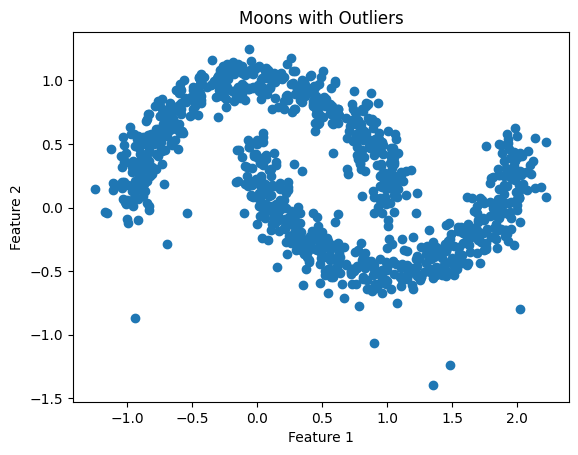

In [4]:
plt.scatter(df["feature_1"], df["feature_2"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons with Outliers")

## DBSCAN

In [5]:
clustering = DBSCAN(eps=0.15, min_samples=10).fit(X)
df["clustering_label"] = clustering.labels_
df

,feature_1,feature_2,target,clustering_label
0,0.028384,0.172982,1,0
1,-0.915172,0.559512,0,1
2,0.761297,0.744895,0,1
3,0.060179,0.187477,1,0
4,1.952899,0.247692,1,0
...,...,...,...,...
995,1.622085,-0.434456,1,0
996,1.928517,-0.048280,1,0
997,-0.889217,0.226923,0,1
998,1.620656,-0.129020,1,0


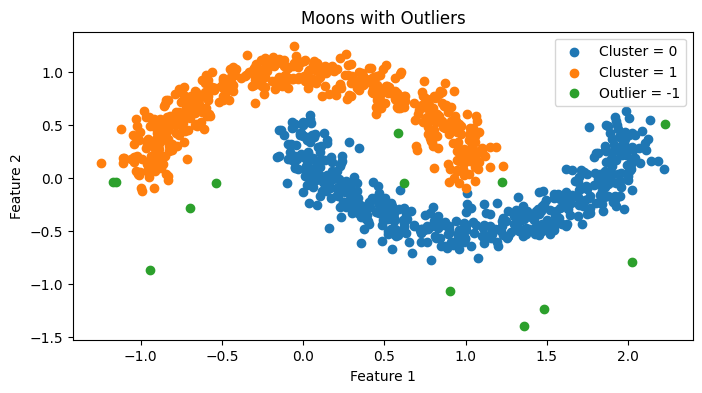

In [8]:
plt.figure(figsize=(8,4))
for c in df.clustering_label.unique():
    df_loc = df.loc[df.clustering_label == c, :].copy()
    if c == -1:
        plt.scatter(df_loc["feature_1"], df_loc["feature_2"], label = f"Outlier = {c}")
    else:
        plt.scatter(df_loc["feature_1"], df_loc["feature_2"], label = f"Cluster = {c}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Moons with Outliers")
plt.legend()
plt.savefig("img/dbscan_on_moons.png", dpi = 300, bbox_inches='tight')
plt.show()